## Hypothesis test

In [1]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
from statsmodels.stats.weightstats import ztest

## For one sample

In [23]:
# H1: P > 0.5
from scipy.stats import norm
z_critical = norm.ppf(0.95)
print("Z_critical: ", z_critical)
d = np.concatenate((np.ones(530),np.zeros(470)))
ztest(d,value=0.5,alternative='larger')

Z_critical:  1.6448536269514722


(1.8998404716564716, 0.028727028984740197)

> the first result is z-value and the second one is the p-value
> - z-value should be greater than z-critical and p-value should be smaller then significant parameter 'aplha' 
> - for example: alpha = 0.05 , so you will reject the hypothesis
> - 'larger' option means that I want to choose right tailed test
      
 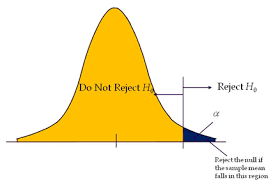

-  p-value = 0.028 which is small than alpha = 0.05 , z-score (1.89) is larger than z-critical (1.64).SO we can reject the hypothesis which say that the mean is equal to 0.5

In [24]:
# Let's try when we choose smaller -- H1: P < 0.5
print("z-critical: ",norm.ppf(0.05))
d = np.concatenate((np.ones(470),np.zeros(530)))
ztest(d,value=0.5,alternative='smaller')

z-critical:  -1.6448536269514729


(-1.8998404716564716, 0.028727028984740197)

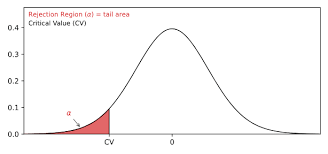

- Here also we will reject H0 

In [28]:
# Let's try when we choose smaller or larger -- H1: P != 0.5
print("z-critical: ",norm.ppf(0.05))
d = np.concatenate((np.ones(470),np.zeros(530)))
ztest(d,value=0.5)

z-critical:  -1.6448536269514729


(-1.8998404716564716, 0.057454057969480395)

In [27]:
0.057454057969480395/2

0.028727028984740197

```python
a => ztest(d,value=0.5,alternative='larger')
b => ztest(d,value=0.5)
```
the value of b is 2*a value, as b is two sided and it's p-value is: p-value of right side + p-value of left side

- If we want to calculate the confidence interval :

In [35]:
X_=d.mean()
X_

0.47

In [36]:
SE =0.5*(1-0.5)/np.sqrt(len(d))
SE

0.007905694150420948

In [37]:
CI_L_Z,CI_H_Z = X_-(norm.ppf(0.05))*SE , X_+(norm.ppf(0.05))*SE

In [38]:
CI_L_Z,CI_H_Z

(0.48300370969688894, 0.456996290303111)

**If you want to check the hypothesis about mean, you need to use t-test**

- The hypothesis we have suppose that the mean of houses is 5000

In [41]:
# we will use scipy for faster coding
from scipy.stats import ttest_1samp
areas = {'area':[1215,5462,8456,7854,4521,6589,6523,6587,5478,8745,8462]}
df = pd.DataFrame(areas)
df.mean()

area    6353.818182
dtype: float64

In [42]:
ttest_1samp(a=df,popmean=5000)

TtestResult(statistic=array([2.04308476]), pvalue=array([0.06829405]), df=array([10]))

In [44]:
ttest_1samp(a=df,popmean=5000,alternative='greater')

TtestResult(statistic=array([2.04308476]), pvalue=array([0.03414703]), df=array([10]))

-------------------------------------------------------------------------------------------------

## Paired t-test

- Here we want to see if applying different engine oil will increase the spead of the car or not, so we will check with `greater` t-test.
- Note that: here the two samples are dependent on each other.

H0: mean = 0 "no improvement"

In [3]:
# prehold the mileage before applying different engine oil
pre = [30,31,34,40,36,35,34,30,28,29]

# after applying different engine oil
post = [30,31,32,38,32,31,32,29,28,30]

In [5]:
from scipy.stats import ttest_rel

In [6]:
ttest_rel(pre,post,alternative ="greater")

TtestResult(statistic=2.584921310565987, pvalue=0.014728926911447638, df=9)

- Pvalue < alpha (0.05)

- We can **reject** the H0

-------------------------------------------------------

## Chi-square

- Chi-square is a test used when you want to apply your test on more than two categorical values in the sample

#### Chi-Square distribution

<Axes: ylabel='Count'>

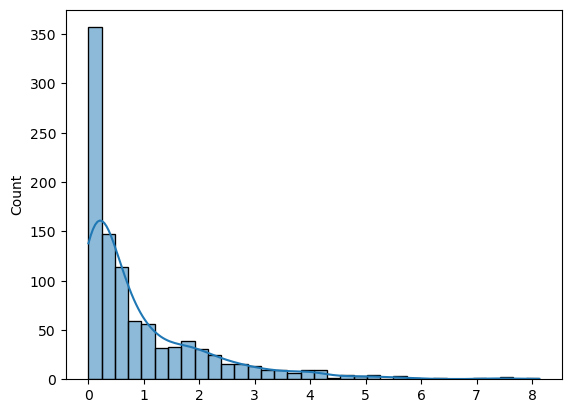

In [14]:
D1 = np.random.normal(size= 1000)
sns.histplot(D1**2,kde=True)

- Chi square when dof = 1

<Axes: ylabel='Count'>

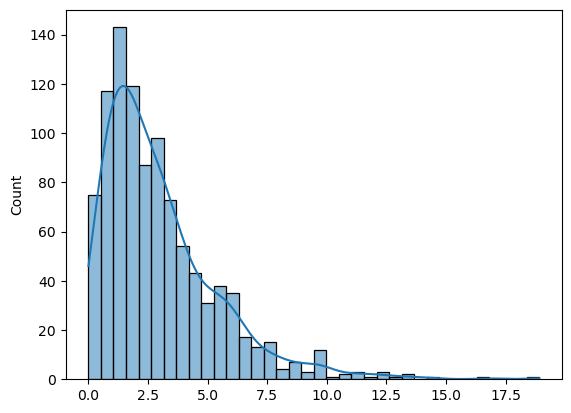

In [13]:
chi = np.zeros(1000)
for i in range(3):
    D = np.random.normal(size=1000)
    chi += D**2

sns.histplot(chi,kde=True)

- dof = 3

<Axes: ylabel='Count'>

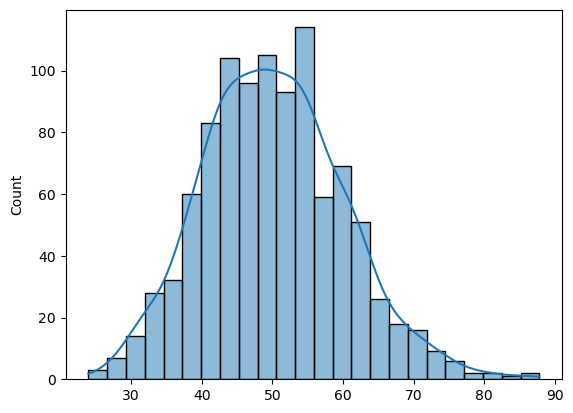

In [17]:
chi = np.zeros(1000)
for i in range(50):
    D = np.random.normal(size=1000)
    chi += D**2

sns.histplot(chi,kde=True)

- dof = 50

We use this distribution instead of normal distribution 

In [18]:
from scipy.stats import chi2

 - chi square value

In [20]:
chi2.ppf(0.95,4)

9.487729036781154

In [21]:
chi2.cdf(15,4)

0.9952987828537434

In [22]:
1-chi2.cdf(15,4)

0.004701217146256598